# Importing necessary libraries

In [78]:
import pandas as pd  # For data manipulation and analysis, especially with DataFrames
import numpy as np  # For numerical operations, including array manipulations
import seaborn as sns  # For data visualization, particularly for statistical plots
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
from statsmodels.graphics.tsaplots import plot_acf  # For plotting the Autocorrelation Function (ACF) of a time series
from statsmodels.tsa.stattools import adfuller  # For performing the Augmented Dickey-Fuller (ADF) test to check for stationarity in a time series


In [81]:
# Reading the dataset from a CSV file using pandas
# Update the path to point to where your CSV file is actually located
df = pd.read_csv("H:\\Other computers\\My Laptop\\3rd Semester M tech\\Python Projects\\Time Series Data Visualization with Python\\stock_data1.csv", parse_dates=True,index_col="Date")

# Displaying the first five rows of the dataset to get an overview
df.head(20)


,Open,High,Low,Close,Volume,Name
Date,,,,,,
01-03-2006,39.69,41.22,38.79,40.91,24232729,AABA
01-04-2006,41.22,41.90,40.77,40.97,20553479,AABA
01-05-2006,40.93,41.73,40.85,41.53,12829610,AABA
01-06-2006,42.88,43.57,42.80,43.21,29422828,AABA
01-09-2006,43.10,43.66,42.82,43.42,16268338,AABA
01-10-2006,42.96,43.34,42.34,42.98,16288580,AABA
01-11-2006,42.19,42.31,41.72,41.87,26192772,AABA
01-12-2006,41.92,41.99,40.76,40.89,18921686,AABA
1/13/2006,41.00,41.08,39.62,39.90,30966185,AABA


In [80]:
# Displaying all column names to check if 'Unnamed: 0' is present
df.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

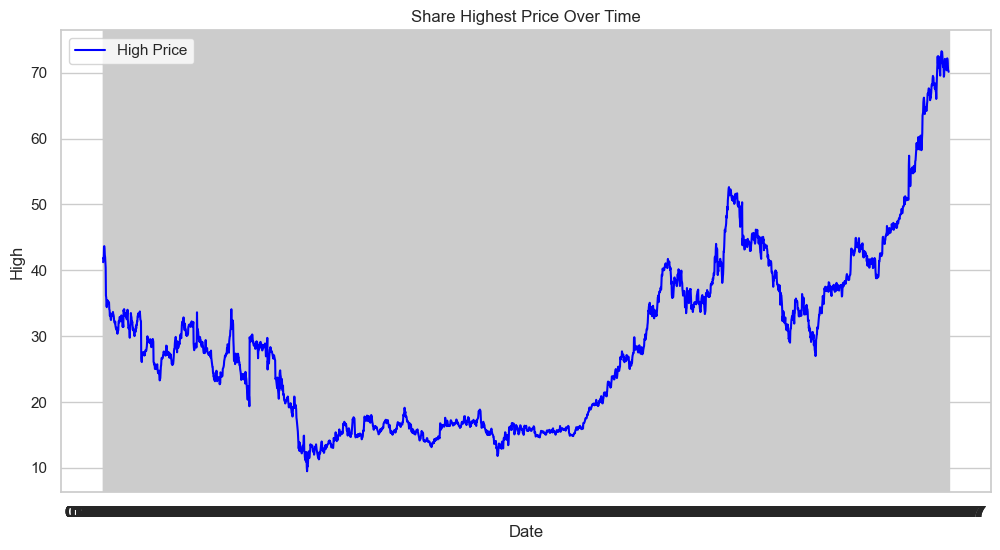

In [35]:
# Importing the seaborn and matplotlib libraries for plotting

# Set the style of the seaborn plots to 'whitegrid' for a clean background
sns.set(style="whitegrid")

# Create a new figure with a specific size (width=12, height=6 inches)
plt.figure(figsize=(12, 6))

# Create a line plot using seaborn
# - data=df: Specifies the DataFrame to use for plotting
# - x='Date': The column to use for the x-axis
# - y='High': The column to use for the y-axis
# - label='High Price': The label for the line in the legend
# - color='blue': The color of the line
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='blue')

# Add labels to the x-axis and y-axis
plt.xlabel('Date')
plt.ylabel('High')

# Add a title to the plot
plt.title('Share Highest Price Over Time')

# Display the plot
plt.show()


In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame (make sure it's loaded correctly)
df = pd.read_csv("H:\\Other computers\\My Laptop\\3rd Semester M tech\\Python Projects\\Time Series Data Visualization with Python\\stock_data1.csv")

# Check the first few rows to understand the date format
print(df.head())

# Ensure 'date' column is in the correct format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')  # Adjust format as needed

# Set the 'date' column as index
df.set_index('date', inplace=True)

# Ensure the index is a DatetimeIndex
df.index = pd.to_datetime(df.index)

# Resample to monthly frequency
df_resampled = df.resample('ME').mean()  # Use 'ME' for end of the month

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the 'High' column
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resampled, x=df_resampled.index, y='High', label='Month Wise Average High Price', color='blue')

# Add labels and title
plt.xlabel('Date (Monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')

plt.show()



         Date   Open   High    Low  Close    Volume  Name
0  01-03-2006  39.69  41.22  38.79  40.91  24232729  AABA
1  01-04-2006  41.22  41.90  40.77  40.97  20553479  AABA
2  01-05-2006  40.93  41.73  40.85  41.53  12829610  AABA
3  01-06-2006  42.88  43.57  42.80  43.21  29422828  AABA
4  01-09-2006  43.10  43.66  42.82  43.42  16268338  AABA


KeyError: 'date'